#CONTENTS:
*   Data cleaning
*   Exploratory Data Analysis
*   Feature scaling
*   Classification using ML classifiers, CNN model
*   Regression using ML Regressor models
*   Feature importance





In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set(style='white')
df_1=pd.read_csv('/content/drive/My Drive/datasets/market_fact.csv')
df_2=pd.read_csv('/content/drive/My Drive/datasets/cust_dimen.csv')
df_3=pd.read_csv('/content/drive/My Drive/datasets/prod_dimen.csv')
df_4=pd.read_csv('/content/drive/My Drive/datasets/shipping_dimen.csv')
df_5=pd.read_csv('/content/drive/My Drive/datasets/orders_dimen.csv')
df_6=pd.merge(df_1,df_3,how="inner",on="Prod_id")
df_merged=pd.merge(df_6,df_2,how="inner",on="Cust_id")
df_merged

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,TECHNOLOGY,TELEPHONES AND COMMUNICATION,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Ord_973,Prod_8,SHP_1343,Cust_357,29.05,0.08,4,-20.90,4.32,0.64,TECHNOLOGY,COMPUTER PERIPHERALS,THEONE PIPPENGER,BRITISH COLUMBIA,WEST,CORPORATE
8395,Ord_1832,Prod_8,SHP_2526,Cust_636,57.03,0.00,7,-31.38,3.52,0.68,TECHNOLOGY,COMPUTER PERIPHERALS,TOM PRESCOTT,NEWFOUNDLAND,ATLANTIC,SMALL BUSINESS
8396,Ord_2010,Prod_8,SHP_2748,Cust_760,282.58,0.10,36,21.68,1.99,0.52,TECHNOLOGY,COMPUTER PERIPHERALS,TRACY PODDAR,NOVA SCOTIA,ATLANTIC,CORPORATE
8397,Ord_2988,Prod_14,SHP_4132,Cust_1105,9262.35,0.09,47,2787.59,24.49,0.46,TECHNOLOGY,COPIERS AND FAX,BECKY MARTIN,ONTARIO,ONTARIO,HOME OFFICE


In [ ]:
print(df_merged.shape)

(8399, 16)


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ord_id                8399 non-null   object 
 1   Prod_id               8399 non-null   object 
 2   Ship_id               8399 non-null   object 
 3   Cust_id               8399 non-null   object 
 4   Sales                 8399 non-null   float64
 5   Discount              8399 non-null   float64
 6   Order_Quantity        8399 non-null   int64  
 7   Profit                8399 non-null   float64
 8   Shipping_Cost         8399 non-null   float64
 9   Product_Base_Margin   8336 non-null   float64
 10  Product_Category      8399 non-null   object 
 11  Product_Sub_Category  8399 non-null   object 
 12  Customer_Name         8399 non-null   object 
 13  Province              8399 non-null   object 
 14  Region                8399 non-null   object 
 15  Customer_Segment     

In [ ]:
df_merged.isnull().sum()

Ord_id                   0
Prod_id                  0
Ship_id                  0
Cust_id                  0
Sales                    0
Discount                 0
Order_Quantity           0
Profit                   0
Shipping_Cost            0
Product_Base_Margin     63
Product_Category         0
Product_Sub_Category     0
Customer_Name            0
Province                 0
Region                   0
Customer_Segment         0
dtype: int64

In [ ]:
df_merged.describe()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513
std,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135589
min,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000
25%,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000
50%,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000
75%,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000
max,89061.050000,0.250000,50.000000,27220.690000,164.730000,0.850000


#DATA CLEANING: Filling Null values

In [ ]:
df_merged['Product_Base_Margin'].fillna(df_merged['Product_Base_Margin'].mean(),inplace=True)
df_merged.isnull().sum()

Ord_id                  0
Prod_id                 0
Ship_id                 0
Cust_id                 0
Sales                   0
Discount                0
Order_Quantity          0
Profit                  0
Shipping_Cost           0
Product_Base_Margin     0
Product_Category        0
Product_Sub_Category    0
Customer_Name           0
Province                0
Region                  0
Customer_Segment        0
dtype: int64

#DATA CLEANING: Outliers detection and treatment of extreme values or potential outliers

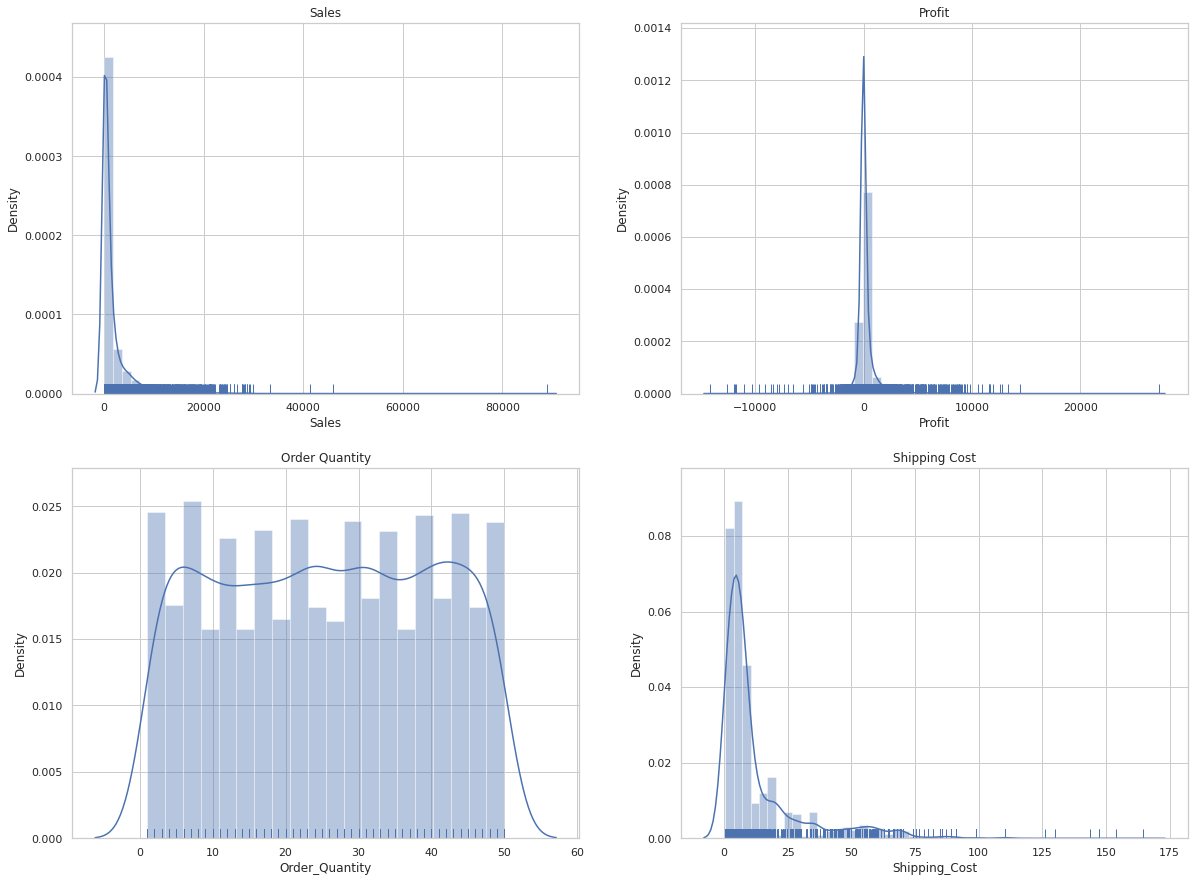

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Sales')
sns.distplot(df_merged['Sales'],rug=True)
plt.subplot(2,2,2)
plt.title('Profit')
sns.distplot(df_merged['Profit'],rug=True)
plt.subplot(2,2,3)
plt.title('Order Quantity')
sns.distplot(df_merged['Order_Quantity'],rug=True)
plt.subplot(2,2,4)
plt.title('Shipping Cost')
sns.distplot(df_merged['Shipping_Cost'],rug=True)
plt.show()

In [ ]:
df=df_merged[(df_merged['Profit']<9500) & (df_merged['Profit']>-3000) & (df_merged['Sales']<30000)]
df
print(df.shape)
print(type(df))

(8342, 16)
<class 'pandas.core.frame.DataFrame'>


CONCLUSION : 1. Most of the items have the no. of sales ranging from 0 to 30000. Among those the ones having sales from 0 to about 1000 are maximum because there lies the highest probability of sales of items.
2. Maximum products have incurred profits of 1000 or 2000 or loss of 1000. There are fewer items incurring greater loss or greater profits.
3. All the products are more or less uniformly ordered in quantites from 0 to 50 lots
4. Most of the values are falling on the lower range. Most of the items have lower shipping cost which can be seen from the graph that the prob. of having lower shipping cost for a particular product being higher. There are lesser number of prodcuts incurring higher shipping cost. The density of prodcuts having lower shipping costs are higher

#EXPLORATORY DATA ANALYSIS:

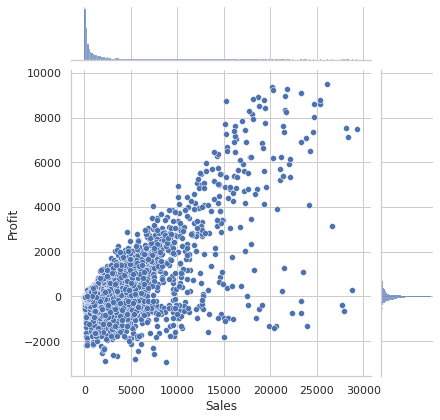

In [ ]:
sns.jointplot('Sales','Profit',df)
plt.show()

CONCLUSION: After eliminating the outliers, we can see that now the 'Sales' & 'Profit' values are well distributed, suitable for visualization. There are items having higher sales but still incurring huge losses. This may be due to the higher shipping costs of those items.

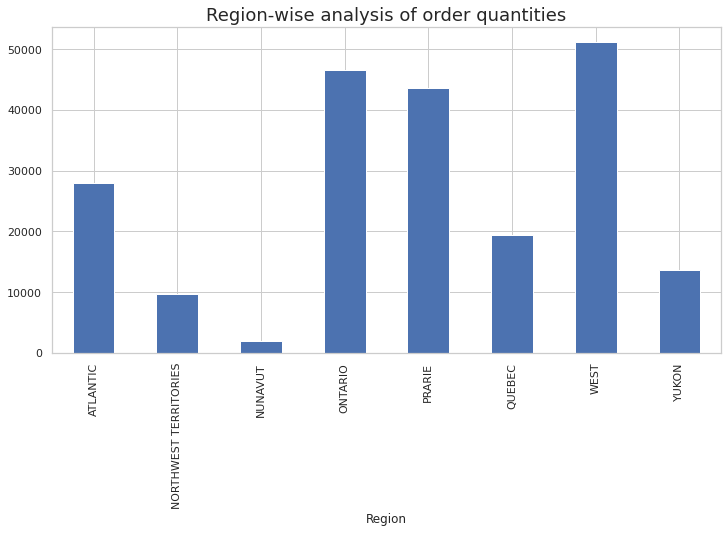

In [ ]:
order_quantity=df.groupby('Region').Order_Quantity.sum()
order_quantity.plot(kind='bar',figsize=(12,6))
plt.title('Region-wise analysis of order quantities',fontsize=18)
plt.xticks(rotation=90)
plt.show()

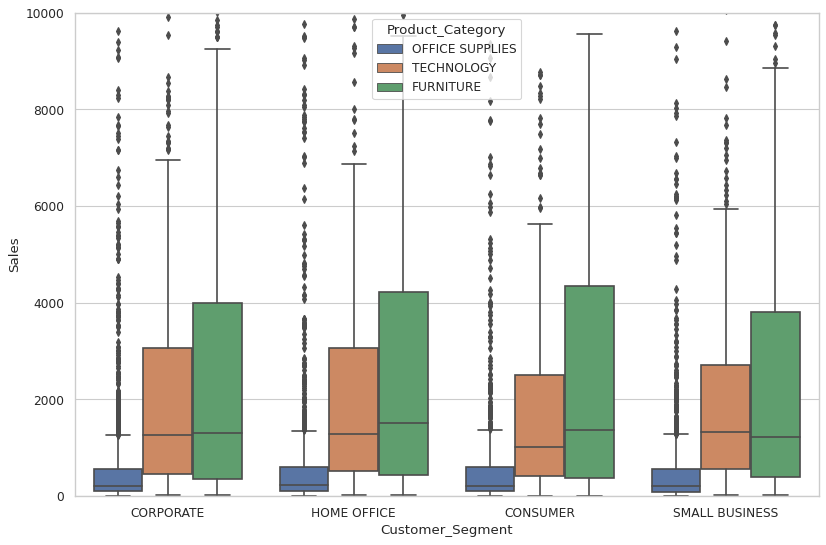

In [ ]:
plt.figure(num=None,figsize=(12,8),dpi=80,facecolor='w',edgecolor='k')
sns.boxplot(x='Customer_Segment',y='Sales',hue="Product_Category",data=df)
plt.ylim((0,10000))
plt.show()

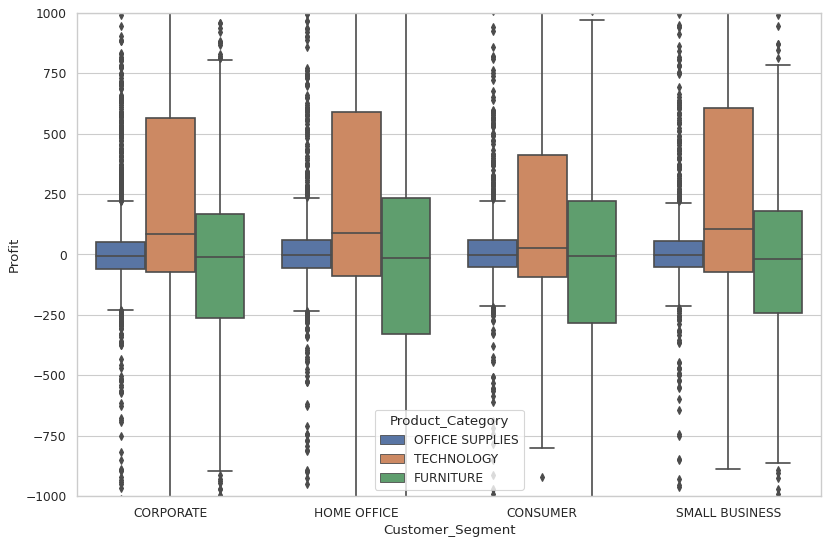

In [ ]:
plt.figure(num=None,figsize=(12,8),dpi=80,facecolor='w',edgecolor='k')
sns.boxplot(x='Customer_Segment',y='Profit',hue="Product_Category",data=df)
plt.ylim((-1000,1000))
plt.show()

CONCLUSION: From the majority of the information, we can see that office supplies incurrs more or less same profit or loss accross all the customer segments, Technology related products are most profitable across all segments and furnitures incurr maximum losses, may be due to their more shipping expenses

#Feature Scaling:

In [ ]:
data=df.drop(columns=['Ord_id','Prod_id','Ship_id','Cust_id','Customer_Name'])
data
print(data.shape)

(8342, 11)


In [ ]:
data

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Province,Region,Customer_Segment
0,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",ALBERTA,WEST,CORPORATE
1,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,ALBERTA,WEST,CORPORATE
2,4701.69,0.00,26,1148.90,2.50,0.59,TECHNOLOGY,TELEPHONES AND COMMUNICATION,ALBERTA,WEST,CORPORATE
3,2337.89,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER,ALBERTA,WEST,CORPORATE
4,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,ALBERTA,WEST,CORPORATE
...,...,...,...,...,...,...,...,...,...,...,...
8394,29.05,0.08,4,-20.90,4.32,0.64,TECHNOLOGY,COMPUTER PERIPHERALS,BRITISH COLUMBIA,WEST,CORPORATE
8395,57.03,0.00,7,-31.38,3.52,0.68,TECHNOLOGY,COMPUTER PERIPHERALS,NEWFOUNDLAND,ATLANTIC,SMALL BUSINESS
8396,282.58,0.10,36,21.68,1.99,0.52,TECHNOLOGY,COMPUTER PERIPHERALS,NOVA SCOTIA,ATLANTIC,CORPORATE
8397,9262.35,0.09,47,2787.59,24.49,0.46,TECHNOLOGY,COPIERS AND FAX,ONTARIO,ONTARIO,HOME OFFICE


In [ ]:
data.isnull().any()

Sales                   False
Discount                False
Order_Quantity          False
Profit                  False
Shipping_Cost           False
Product_Base_Margin     False
Product_Category        False
Product_Sub_Category    False
Province                False
Region                  False
Customer_Segment        False
dtype: bool

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder
data['Product_Category']=LabelEncoder().fit_transform(data['Product_Category'])
data['Product_Sub_Category']=LabelEncoder().fit_transform(data['Product_Sub_Category'])
data['Province']=LabelEncoder().fit_transform(data['Province'])
data['Region']=LabelEncoder().fit_transform(data['Region'])
data['Customer_Segment']=LabelEncoder().fit_transform(data['Customer_Segment'])
data

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Province,Region,Customer_Segment
0,136.81,0.01,23,-30.51,3.60,0.56,1,13,0,6,1
1,42.27,0.01,13,4.56,0.93,0.54,1,11,0,6,1
2,4701.69,0.00,26,1148.90,2.50,0.59,2,16,0,6,1
3,2337.89,0.09,43,729.34,14.30,0.37,1,10,0,6,1
4,164.02,0.03,23,-47.64,6.15,0.37,1,10,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...
8394,29.05,0.08,4,-20.90,4.32,0.64,2,4,1,6,1
8395,57.03,0.00,7,-31.38,3.52,0.68,2,4,4,0,3
8396,282.58,0.10,36,21.68,1.99,0.52,2,4,6,0,1
8397,9262.35,0.09,47,2787.59,24.49,0.46,2,5,8,3,2


#BUSINESS PROBLEM: The e-retail firm has their prodcuts and the customer they need to reach to. And they want to the predict the product categories, so that based on all the features they can design their app in such a way that each customer segment will see those product categories that they prefer to look up first when they will open the app

In [ ]:
x=data.drop(columns=['Product_Category'])
y=data["Product_Category"]
print(x.shape,y.shape)

(8342, 10) (8342,)


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6673, 10) (6673,)
(1669, 10) (1669,)


In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10],"penalty":["l1","l2"]}

#Logistic Regression model:

In [ ]:
from sklearn.linear_model import LogisticRegression
score=GridSearchCV(LogisticRegression(solver='liblinear'),grid).fit(x_train_std,y_train)
print(score.best_params_)
print(score.best_score_)

{'C': 0.8, 'penalty': 'l2'}
0.710626147600357


In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(solver="liblinear",penalty='l2',C=0.8).fit(x_train_std,y_train)

In [ ]:
y_predict=LR.predict(x_test_std)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
acc=accuracy_score(y_test,y_predict)
prec = precision_score(y_test,y_predict,average='macro')
rec = recall_score(y_test,y_predict,average='macro')
F1_score = f1_score(y_test,y_predict,average='macro')
print("The accuracy is {:,.4f}".format(acc))
print("Precision score is {:,.4f}".format(prec))
print("Recall score is {:,.4f}".format(rec))
print("F score is {:,.4f}".format(F1_score))

The accuracy is 0.6968
Precision score is 0.7049
Recall score is 0.6132
F score is 0.6414


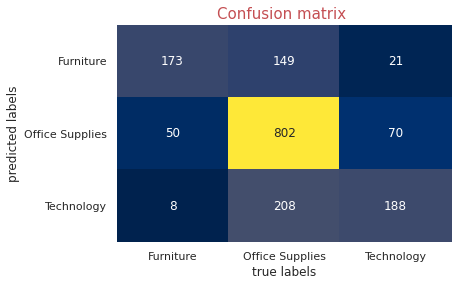

In [ ]:
Labels= ["Furniture", "Office Supplies" , "Technology"]
mat_lr = confusion_matrix(y_test,y_predict)
sns.heatmap(mat_lr, annot=True, fmt='d', xticklabels = Labels, yticklabels = Labels, cbar=False, cmap="cividis")
plt.title("Confusion matrix ",color="r",fontsize=15)
plt.xlabel('true labels')
plt.ylabel('predicted labels')
plt.show()

#SVM Model:

In [ ]:
from sklearn.svm import SVC
linear_svm=SVC(C=1.0, kernel='linear',random_state=0)
linear_svm=linear_svm.fit(x_train_std,y_train)

In [ ]:
y_predict_svm=linear_svm.predict(x_test_std)
acc_svm = accuracy_score(y_test,y_predict_svm)
prec_svm = precision_score(y_test,y_predict_svm,average='macro')
rec_svm = recall_score(y_test,y_predict_svm,average='macro')
F1_score_svm = f1_score(y_test,y_predict_svm,average='macro')
print("The accuracy is {:,.4f}".format(acc_svm))
print("Precision score is {:,.4f}".format(prec_svm))
print("Recall score is {:,.4f}".format(rec_svm))
print("F score is {:,.4f}".format(F1_score_svm))

The accuracy is 0.6854
Precision score is 0.7108
Recall score is 0.5821
F score is 0.6107


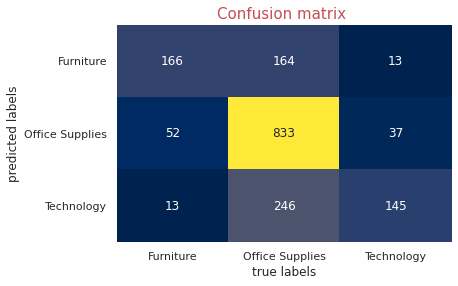

In [ ]:
mat_svm = confusion_matrix(y_test,y_predict_svm)
sns.heatmap(mat_svm, annot=True, fmt='d', xticklabels = Labels, yticklabels = Labels, cbar=False, cmap="cividis")
plt.title("Confusion matrix ",color="r",fontsize=15)
plt.xlabel('true labels')
plt.ylabel('predicted labels')
plt.show()

#KNN Model:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
knn=knn.fit(x_train_std,y_train)
y_pred_KNN=knn.predict(x_test_std)
acc_KNN= accuracy_score(y_test,y_pred_KNN)
prec_KNN = precision_score(y_test,y_pred_KNN,average='macro')
rec_KNN = recall_score(y_test,y_pred_KNN,average='macro')
F1_score_KNN = f1_score(y_test,y_pred_KNN,average='macro')
print("The accuracy is {:,.4f}".format(acc_KNN))
print("Precision score is {:,.4f}".format(prec_KNN))
print("Recall score is {:,.4f}".format(rec_KNN))
print("F score is {:,.4f}".format(F1_score_KNN))

The accuracy is 0.8053
Precision score is 0.7998
Recall score is 0.7564
F score is 0.7731


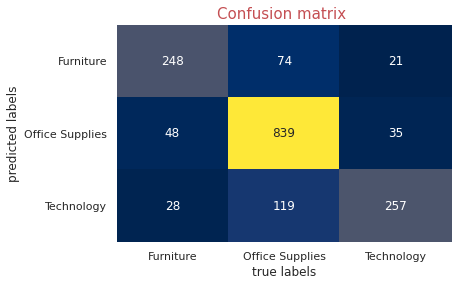

In [ ]:
mat_KNN = confusion_matrix(y_test,y_pred_KNN)
sns.heatmap(mat_KNN, annot=True, fmt='d', xticklabels = Labels, yticklabels = Labels, cbar=False, cmap="cividis")
plt.title("Confusion matrix ",color="r",fontsize=15)
plt.xlabel('true labels')
plt.ylabel('predicted labels')
plt.show()

#Naives Bayes model:

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb=nb.fit(x_train_std,y_train)
y_pred_NB=nb.predict(x_test_std)
acc_NB= accuracy_score(y_test,y_pred_NB)
prec_NB = precision_score(y_test,y_pred_NB,average='macro')
rec_NB = recall_score(y_test,y_pred_NB,average='macro')
F1_score_NB = f1_score(y_test,y_pred_NB,average='macro')
print("The accuracy is {:,.4f}".format(acc_NB))
print("Precision score is {:,.4f}".format(prec_NB))
print("Recall score is {:,.4f}".format(rec_NB))
print("F score is {:,.4f}".format(F1_score_NB))

The accuracy is 0.6483
Precision score is 0.6553
Recall score is 0.5370
F score is 0.5541


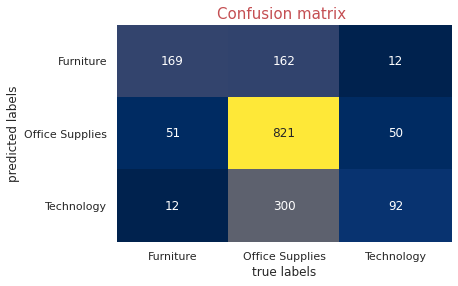

In [ ]:
mat_NB = confusion_matrix(y_test,y_pred_NB)
sns.heatmap(mat_NB, annot=True, fmt='d', xticklabels = Labels, yticklabels = Labels, cbar=False, cmap="cividis")
plt.title("Confusion matrix ",color="r",fontsize=15)
plt.xlabel('true labels')
plt.ylabel('predicted labels')
plt.show()

#Decision Tree model:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
tree=tree.fit(x_train,y_train)

In [ ]:
y_predict_tree=tree.predict(x_test)
acc_tree=accuracy_score(y_test,y_predict_tree)
prec_tree = precision_score(y_test,y_predict_tree,average='macro')
rec_tree = recall_score(y_test,y_predict_tree,average='macro')
F1_score_tree = f1_score(y_test,y_predict_tree,average='macro')
print("The accuracy is {:,.4f}".format(acc_tree))
print("Precision score is {:,.4f}".format(prec_tree))
print("Recall score is {:,.4f}".format(rec_tree))
print("F score is {:,.4f}".format(F1_score_tree))

The accuracy is 0.8664
Precision score is 0.8680
Recall score is 0.8145
F score is 0.8005


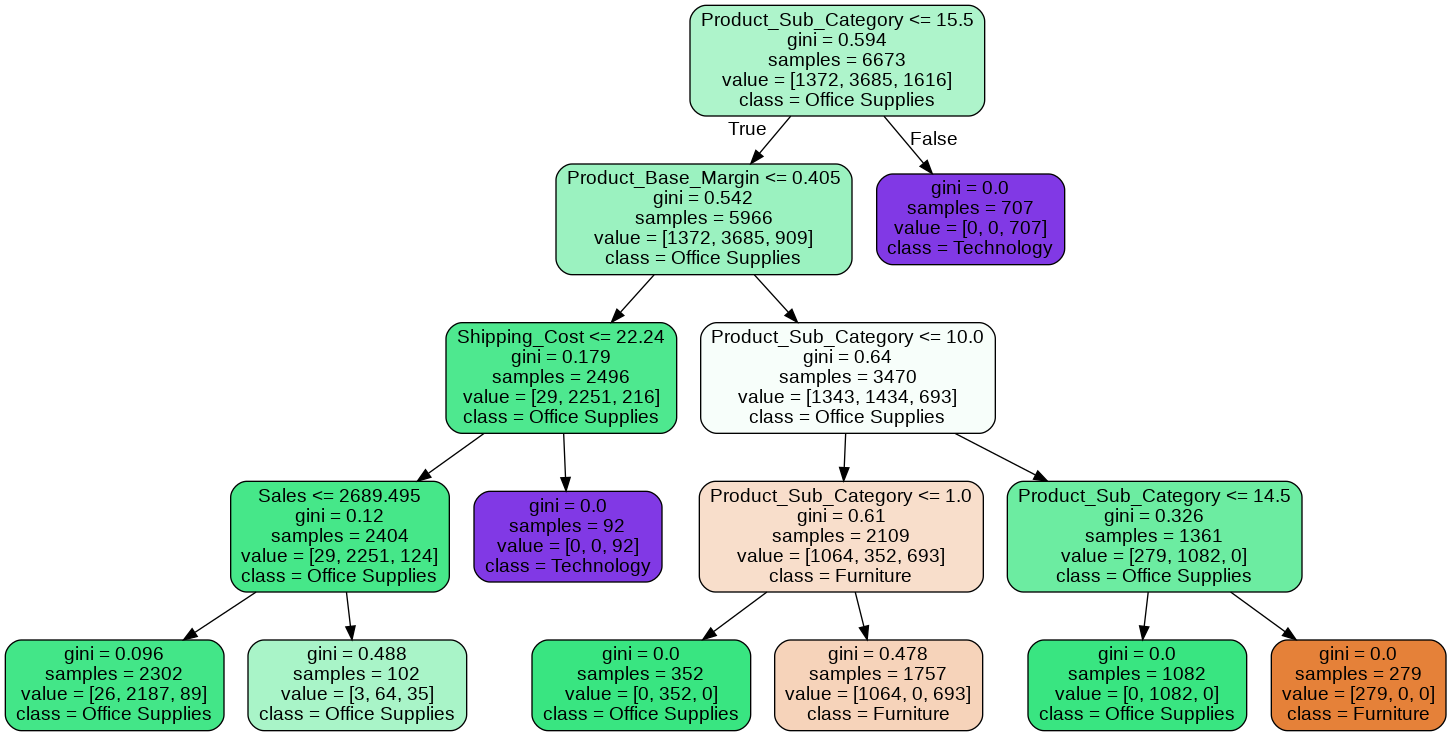

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
f_n=["Sales","Discount","Order_Quantity","Profit","Shipping_Cost","Product_Base_Margin","Product_Sub_Category","Province","Region","Customer_Segment"]
c_n=["Furniture", "Office Supplies" , "Technology"]
dot_data=export_graphviz(tree, filled=True, rounded=True, class_names=c_n,feature_names=f_n,out_file=None)
graph=graph_from_dot_data(dot_data)
Image(graph.create_png())

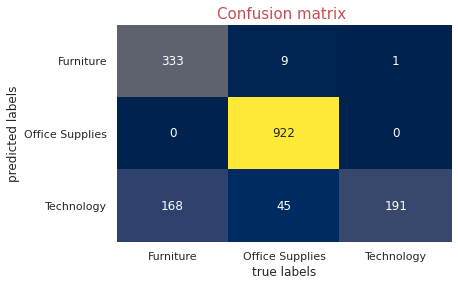

In [ ]:
mat_tree = confusion_matrix(y_test,y_predict_tree)
sns.heatmap(mat_tree, annot=True, fmt='d', xticklabels = Labels, yticklabels = Labels, cbar=False, cmap="cividis")
plt.title("Confusion matrix ",color="r",fontsize=15)
plt.xlabel('true labels')
plt.ylabel('predicted labels')
plt.show()

#Random Forest Classifier model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion='gini', n_estimators=25, random_state=0)
forest=forest.fit(x_train,y_train)

In [ ]:
y_predict_forest=forest.predict(x_test)
acc_forest=accuracy_score(y_test,y_predict_forest)
prec_forest = precision_score(y_test,y_predict_forest,average='macro')
rec_forest = recall_score(y_test,y_predict_forest,average='macro')
F1_score_forest = f1_score(y_test,y_predict_forest,average='macro')
print("The accuracy is {:,.4f}".format(acc_forest))
print("Precision score is {:,.4f}".format(prec_forest))
print("Recall score is {:,.4f}".format(rec_forest))
print("F score is {:,.4f}".format(F1_score_forest))

The accuracy is 0.9964
Precision score is 0.9974
Recall score is 0.9946
F score is 0.9960


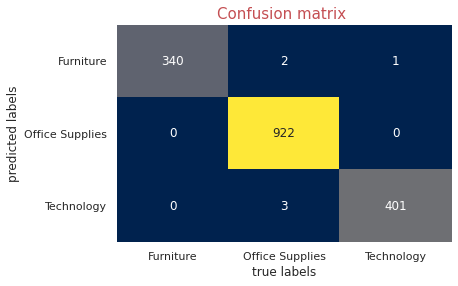

In [ ]:
mat_forest = confusion_matrix(y_test,y_predict_forest)
sns.heatmap(mat_forest, annot=True, fmt='d', xticklabels = Labels, yticklabels = Labels, cbar=False, cmap="cividis")
plt.title("Confusion matrix ",color="r",fontsize=15)
plt.xlabel('true labels')
plt.ylabel('predicted labels')
plt.show()

#XGBoost Classifier model:

In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier(gamma=5,learning_rate=0.3,max_depth=15,n_estimators=100)
model_xgb.fit(x_train_std,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5,
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_predict_xgb=model_xgb.predict(x_test_std)
acc_xgb=accuracy_score(y_test,y_predict_xgb)
prec_xgb = precision_score(y_test,y_predict_xgb,average='macro')
rec_xgb = recall_score(y_test,y_predict_xgb,average='macro')
F1_score_xgb = f1_score(y_test,y_predict_xgb,average='macro')
print("The accuracy is {:,.4f}".format(acc_xgb))
print("Precision score is {:,.4f}".format(prec_xgb))
print("Recall score is {:,.4f}".format(rec_xgb))
print("F score is {:,.4f}".format(F1_score_xgb))

The accuracy is 0.9994
Precision score is 0.9996
Recall score is 0.9990
F score is 0.9993


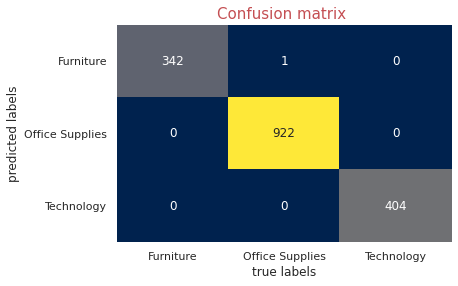

In [ ]:
mat_xgb = confusion_matrix(y_test,y_predict_xgb)
sns.heatmap(mat_xgb, annot=True, fmt='d', xticklabels = Labels, yticklabels = Labels, cbar=False, cmap="cividis")
plt.title("Confusion matrix ",color="r",fontsize=15)
plt.xlabel('true labels')
plt.ylabel('predicted labels')
plt.show()

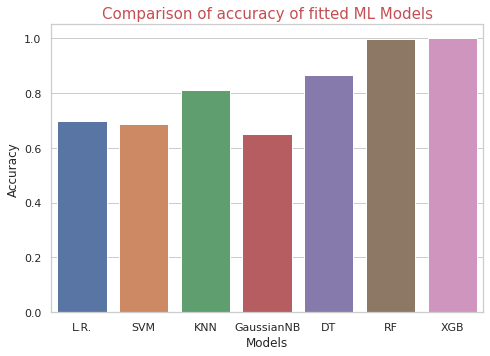

<Figure size 360x360 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1],"hammer")
Labels = ["L.R.","SVM","KNN","GaussianNB","DT","RF","XGB"]
Accuracy=[acc,acc_svm,acc_KNN,acc_NB,acc_tree,acc_forest,acc_xgb]
sns.barplot(Labels,Accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of accuracy of fitted ML Models",fontsize=15,color="r")
plt.figure(figsize=(5,5))
plt.show()

#So, the Random forest and the XGBoost classifier models do the best job in predicting the product categories based on the given input features.

#CNN Model for predicting product categories:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten ,Dense, Dropout,BatchNormalization 
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler 
print(tf.__version__)

2.3.0


In [ ]:
x=(data.drop(columns=['Product_Category'])).values
y=(data["Product_Category"]).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_train.shape, x_test.shape

((6673, 10, 1), (1669, 10, 1))

In [ ]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [ ]:
epochs = 50
model = Sequential()
model.add(Conv1D(96,2,activation="relu", input_shape = x_train_std[0].shape))
model.add(Dropout(0.2))

model.add(Conv1D(192,2,activation="relu"))
model.add(Dropout(0.5))

model.add(Conv1D(192,2,activation="relu"))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(1, activation= "softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 96)             288       
_________________________________________________________________
dropout (Dropout)            (None, 9, 96)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 192)            37056     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 192)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 7, 192)            73920     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 192)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1344)              0

In [ ]:
history = model.fit(x_train, y_train, epochs = epochs, batch_size = 128, validation_data = (x_test,y_test), verbose=1)

Epoch 1/50
53/53 [==============================] - 2s 32ms/step - loss: 0.0000e+00 - accuracy: 0.5522 - val_loss: 0.0000e+00 - val_accuracy: 0.5524
Epoch 2/50
53/53 [==============================] - 2s 30ms/step - loss: 0.0000e+00 - accuracy: 0.5522 - val_loss: 0.0000e+00 - val_accuracy: 0.5524
Epoch 3/50
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - accuracy: 0.5522 - val_loss: 0.0000e+00 - val_accuracy: 0.5524
Epoch 4/50
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - accuracy: 0.5522 - val_loss: 0.0000e+00 - val_accuracy: 0.5524
Epoch 5/50
53/53 [==============================] - 2s 32ms/step - loss: 0.0000e+00 - accuracy: 0.5522 - val_loss: 0.0000e+00 - val_accuracy: 0.5524
Epoch 6/50
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - accuracy: 0.5522 - val_loss: 0.0000e+00 - val_accuracy: 0.5524
Epoch 7/50
53/53 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - accuracy: 0.5522 - v

In [ ]:
keras.backend.clear_session()

#BUSINESS PROBLEM: To predict the profit from each shipment or order so that they can design their prodcuts accordingly in future

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
inputs=(data[["Sales","Discount","Order_Quantity","Shipping_Cost","Product_Base_Margin"]]).values
target=(data[["Profit"]]).values
inputs_train,inputs_test,target_train,target_test=train_test_split(inputs,target,test_size=0.2,random_state=42)
scaler=MinMaxScaler()
inputs_train_mms=scaler.fit_transform(inputs_train)
inputs_test_mms=scaler.transform(inputs_test)
print(inputs_train.shape,target_train.shape)
print(inputs_test.shape,target_test.shape)

(6673, 5) (6673, 1)
(1669, 5) (1669, 1)


#Checking multicollinearity:

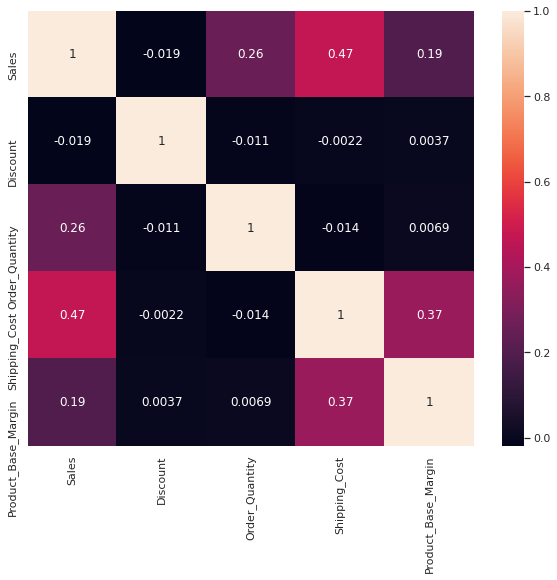

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(inputs.corr(),annot=True)

#There is no multicollinearity, so regression can be peformed.

#Linear Regression Model:

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(inputs_train_mms,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
model.score(inputs_test_mms,target_test)

0.7281531682789937

#Random Forest Regressor model:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_jobs=-1, n_estimators = 25, max_leaf_nodes=10000, random_state=1)
model_rf.fit(inputs_train,target_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=10000,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
model_rf.score(inputs_test,target_test)

0.8596806303264468

#Light LGBM Regressor model:

In [ ]:
import lightgbm as lgb
model_gbm = lgb.LGBMRegressor(bagging_fraction=0.9, bagging_freq=10, boosting_type='gbdt',
       class_weight=None, colsample_bytree=0.5, feature_fraction=0.9,
       importance_type='split', learning_rate=0.01, max_bin=512,
       max_depth=8, metric='mse', n_estimators=1000,
       n_jobs=-1, num_leaves=150, objective='regression', verbose=0)
model_gbm.fit(inputs_train_mms,target_train)

LGBMRegressor(bagging_fraction=0.9, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=0.5, feature_fraction=0.9,
              importance_type='split', learning_rate=0.01, max_bin=512,
              max_depth=8, metric='mse', min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_leaves=150, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
              verbose=0)

In [ ]:
model_gbm.score(inputs_test_mms,target_test)

0.8363174669933109

#XGB Regressor model:

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(max_depth=5, gamma=0.3, learning_rate= 0.1, tree_method='exact')
model_xgb.fit(inputs_train_mms,target_train)

[08:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, tree_method='exact', verbosity=1)

In [ ]:
model_xgb.score(inputs_test_mms,target_test)

0.8639757819274837

#So, the XGBoost Regressor model does the best job in predicting the profit from each product, based on the input features 

#Feature importance:

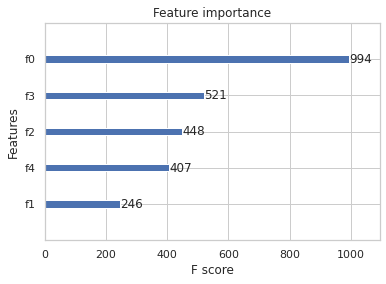

In [ ]:
xgb.plot_importance(model_xgb)

#we got a proof which was expected that the sales for each prodcut plays the most important role in prediction of profit.

#THANK YOU!!!!